# Algoritmo ECLAT

In [1]:
# Função pronta para o algoritmo ECLAT (atualmente o algoritmo não está disponível em uma biblioteca)
import os;
import sys;
import numpy as np;
import datetime as dt;
from numpy import linalg as LA;
import optparse;
import argparse;

(-0.5, 319.5, 239.5, -0.5)

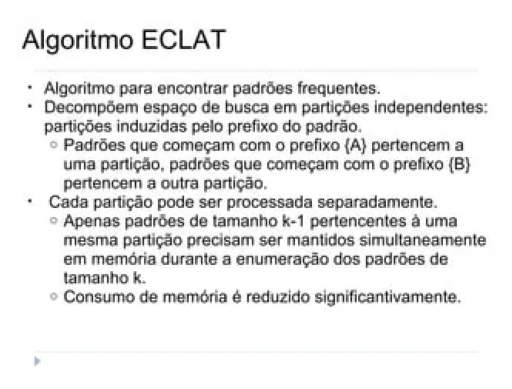

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as img

imagem = img.imread('eclat.webp')
plt.imshow(imagem)
plt.axis('off')

In [3]:
# Global variable 
#containing all frequent patterns with its tid's
F =[];
# Time calculation
#start_time =0;
#end_time=0;

# Pattern class:
class Pattern:
	def __init__(self, item, tids):
		# list of item Id's in the pattern
		self.item_id = item;
		# tid of the pattern
		self.tid_list = tids;

	# union operation of item Id's for two patterns to get ID of candidate pattern
	def 	union_id(self,next_node):
		t = set(self.item_id);
		tt = set(next_node.item_id);
		new = t | tt;
		new_id = list(new);
		new_id.sort();
		return new_id;

	# intersection of tid's of two patterns to find tid of candidate pattern
	def 	intersec_tid_list(self,next_node):
		t = set(self.tid_list);
		tt = set(next_node.tid_list);
		new = t & tt;
		new_list = list(new);
		new_list.sort();
		return new_list;
	
	# returns support value for the pattern
	def	getSup(self):
		return len(self.tid_list);
	
	
#	def	compare(self,n):
#		if self.item_id == n.item_id:
#			return 1;
#		return 0;

	#Candidate generation & check for support	
	def	generate_check(self, n , minsup):
		
		# generating tid_list first
		temp_tid_list = self.intersec_tid_list(n);
		
		# if support for new candidate is >= minsup then only generate ID for that candidate		
		if len(temp_tid_list) >= minsup:
			temp_id = self.union_id(n);
			return (temp_id,temp_tid_list);
		else:
			return ([],[]);
	def	pattern_print(self):
		pattern_ID = str("");
		for i in self.item_id:
			pattern_ID = pattern_ID + str(i) + ' ';
		print(pattern_ID + '\t\t : ' + str(self.tid_list)); 
			
#End of Pattern class

In [4]:
# Pattern Store class:
class PatternStore:
	def 	__init__(self):
		self.Pattern_list = [];
	
	# Add a whole group of pattern to the list
	def	addGroup(self,list_nodes):
		for n in list_nodes:
			self.Pattern_list.append(n);

	# Retursn i_th pattern from the list if available
	def	getNode(self,index):
		if index < len(self.Pattern_list):
			return self.Pattern_list[index];
		else:
			return [];
	
	# To Fallow DFS method: Recursive function is used - to calculate all frequent patterns from the 1st level frequent list
	def 	Eclat(self,minsup):
		for node in self.Pattern_list:
			F.append(node);
			new_P = PatternStore();
			# As all patterns are sorted initially get only next pattern from the current
			index = self.Pattern_list.index(node);
			i = index +1;
			n = self.getNode(i);
			
			while n:
				# Here I am doing 2 steps togather: 1- candidate generation & 2- checking for minsup
				(temp_id,temp_tid_list) = node.generate_check(n,minsup);
				# if temp_id is not empty				
				if temp_id:				
					new_P.Pattern_list.append(Pattern(temp_id,temp_tid_list));
				i = i +1;
				# get next node from the list
				n = self.getNode(i);
			# if any possible pattern child go to child first, DFS
			if new_P.Pattern_list:
				new_P.Eclat(minsup);

#End of PatternStore class

In [5]:
class DBReader:

	def	__init__(self,filetoread):
		self.file_id = filetoread;
	def	readFile(self):
		# stores each transaction
		self.trans=[];
		# stores no of items in each tansaction
		self.no_items = [];
		for	line	in	self.file_id:
			tuplex=line.split(" ");
			mylist=[];
			self.no_items.append(tuplex[0]);
			for	position	in	range(1,len(tuplex)):
				mylist.append(tuplex[position]);	
	
			self.trans.append(mylist);

	# From transactions: generate patterns and prepare a list
	def	genPatternList(self):
		#all items
		temp = [item for sublist in self.trans for item in sublist];

		#removing duplicates
		my_set = set(temp)
		self.items = list(my_set)

		#put in sorted oirder
		self.items.sort();
		
		# generate level_1 pattern list
		self.level_1 = [];

		# Start the timmer as candidate generation for level 1 is a part of Eclat algorithm.
		start_time = dt.datetime.now();		
		
		#generate all candidates for level 1
		for it in self.items:
			item = [];
			item.append(it)
			self.level_1.append(Pattern(item,[]));	
		
		# generate tid_list for every items in level 1 
		i=0;
		for t in self.trans:
			i = i + 1;
			t.sort();
			for it_id in t:
				index = self.items.index(it_id);
				self.level_1[index].tid_list.append(i);
	
		return start_time;

	# returns frequent patterns
	def	getFrequent(self,minsup):
		self.P = [];
		for n in self.level_1:
			c = int(n.getSup());
			if  c >= minsup:
				#print c;
				self.P.append(n);
		return self.P;

#End of DBReader class

In [6]:
def main(file, support):
	#printing flag
	p_flag = 1;

	#parser = optparse.OptionParser("usage: %prog [options] arg1 arg2")
	#parser.add_option("-f",  dest="filename", default="data.txt", type="string", help="specify filename to run on");
	#parser.add_option("-s",  dest="supnum", default=0, type="int", help="give minimun support to run on");
	#parser.add_option("-p",  dest="p", default=1, type="int");
	#(options, args) = parser.parse_args();

	parser = argparse.ArgumentParser();
	parser.add_argument("-f","--filename");
	parser.add_argument("-s","--supnum", type=int);
	parser.add_argument("-p", "--print_flag", action="store_true");
	args = parser.parse_args();
	
 
	#if	len(sys.argv) < 3:
	#	print('Please give me the filename &  minimum support value'+os.linesep);
	#	sys.exit(1);
	try:	
		#file name
		f_name = file;
		fileToRead=open(f_name);
		#fileToRead = open("data.txt");
		#Minimum Spport vlaue	
		minsup = support;
		# printing flag 
		if args.print_flag:
			p_flag = 1;	
	except(IOError,IndexError):
		print('Bad file name'+os.linesep);
		sys.exit(1);

	
	print('minsup = '+str(minsup));

	#minsup = 2;

	# DBReader object
	reader = DBReader(fileToRead);
	#reading the file
	reader.readFile();
	# Pattern generation for level 1 - It will return the starting time from when candidate generation is started.	
	start_time = reader.genPatternList();
	#print
	
	# Get frequent patterns from all candidates of level 1:
	level1_P = reader.getFrequent(minsup)

	#for n in level1_P:
	#	print n.item_id;
	#	print n.tid_list;

	#correct

	# Create Pattern Store object
	PttStr = PatternStore();
	
	# Add frequent patterns from level 1
	PttStr.addGroup(level1_P);

	# Eclat Algorithm
	PttStr.Eclat(minsup);
	
	end_time = dt.datetime.now();
	
	#print start_time;
	#print end_time;
		
	time = end_time - start_time;
	
	print('Computation time = '+ str(time.total_seconds()) + ' Seconds');
	
	if p_flag == 1:
		print('Pattern\t\t : Tid_List');	
		for n in F:
			n.pattern_print();

#End of main function

In [7]:
# Geração dos itens frequentes
if	__name__== "__main__":
	main('transacoes2.txt', 3);

minsup = 3
Computation time = 0.0 Seconds
Pattern		 : Tid_List
Carvao 		 : [1, 2, 3, 4]
Carvao Cerveja 		 : [1, 3, 4]
Cerveja 		 : [1, 3, 4]
